   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null C

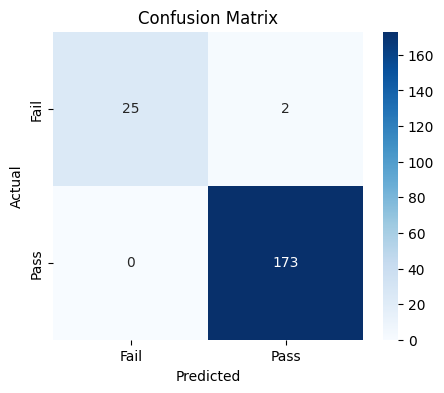


--- Student Prediction ---


Enter Math score (0–100):  78
Enter Reading score (0–100):  89
Enter Writing score (0–100):  89



Gender Encoding:
0 = Female
1 = Male


Enter Gender (0/1):  0



Parental Education Encoding:
0 = High School or below
1 = Bachelor / Master


Enter Parental Education (0/1):  0



Lunch Type Encoding:
0 = Standard
1 = Free / Reduced


Enter Lunch Type (0/1):  0



Test Preparation Encoding:
0 = Not Completed
1 = Completed


Enter Test Preparation (0/1):  1



🎯 Final Prediction: PASS ✅


In [2]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv("StudentsPerformance.csv")  # file name jo Kaggle se aaya

print(df.head())
print(df.shape)
print(df.info())

# =========================
# 3. Create Pass / Fail Column
# =========================
df['AverageScore'] = (
    df['math score'] +
    df['reading score'] +
    df['writing score']
) / 3

df['Passed'] = (df['AverageScore'] >= 50).astype(int)

print(df[['AverageScore', 'Passed']].head())

# =========================
# 4. Encode Categorical Columns
# =========================
le = LabelEncoder()

categorical_cols = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# =========================
# 5. Select Features & Target
# =========================
features = [
    'math score',
    'reading score',
    'writing score',
    'gender',
    'parental level of education',
    'lunch',
    'test preparation course'
]

X = df[features]
y = df['Passed']

# =========================
# 6. Train Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 7. Feature Scaling
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 8. Train Model
# =========================
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# =========================
# 9. Predictions
# =========================
y_pred = model.predict(X_test_scaled)

# =========================
# 10. Evaluation
# =========================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# =========================
# 11. Confusion Matrix Plot
# =========================
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# =========================
# 12. User Prediction
# =========================
print("\n--- Student Prediction ---")
# 📥 User Inputs with clear instructions

math = float(input("Enter Math score (0–100): "))
reading = float(input("Enter Reading score (0–100): "))
writing = float(input("Enter Writing score (0–100): "))

print("\nGender Encoding:")
print("0 = Female")
print("1 = Male")
gender = int(input("Enter Gender (0/1): "))

print("\nParental Education Encoding:")
print("0 = High School or below")
print("1 = Bachelor / Master")
parent_edu = int(input("Enter Parental Education (0/1): "))

print("\nLunch Type Encoding:")
print("0 = Standard")
print("1 = Free / Reduced")
lunch = int(input("Enter Lunch Type (0/1): "))

print("\nTest Preparation Encoding:")
print("0 = Not Completed")
print("1 = Completed")
prep = int(input("Enter Test Preparation (0/1): "))


# 🧾 Create DataFrame in SAME ORDER as training features
user_input = pd.DataFrame([[
    math,
    reading,
    writing,
    gender,
    parent_edu,
    lunch,
    prep
]], columns=features)


# 🔄 Scaling
user_input_scaled = scaler.transform(user_input)

# 🤖 Prediction
prediction = model.predict(user_input_scaled)[0]

# 🎯 Output
result = "PASS ✅" if prediction == 1 else "FAIL ❌"
print("\n🎯 Final Prediction:", result)

